In [1]:
#DATASETS:  https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
#DATASET DESCRIPTION: https://zenodo.org/records/4446043#.ZEV8d-zMI-R

In [2]:
#let's start by importing all packages needed
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
#load the datasets
df_am1 = pd.read_csv('~/Downloads/DAA/archive/amsterdam_weekdays.csv')
df_am2 = pd.read_csv('~/Downloads/DAA/archive/amsterdam_weekends.csv')

df_at1 = pd.read_csv('~/Downloads/DAA/archive/athens_weekdays.csv')
df_at2 = pd.read_csv('~/Downloads/DAA/archive/athens_weekends.csv')

df_ba1 = pd.read_csv('~/Downloads/DAA/archive/barcelona_weekdays.csv')
df_ba2 = pd.read_csv('~/Downloads/DAA/archive/barcelona_weekends.csv')

df_be1 = pd.read_csv('~/Downloads/DAA/archive/berlin_weekdays.csv')
df_be2 = pd.read_csv('~/Downloads/DAA/archive/berlin_weekends.csv')

df_bu1 = pd.read_csv('~/Downloads/DAA/archive/budapest_weekdays.csv')
df_bu2 = pd.read_csv('~/Downloads/DAA/archive/budapest_weekends.csv')

df_li1 = pd.read_csv('~/Downloads/DAA/archive/lisbon_weekdays.csv')
df_li2 = pd.read_csv('~/Downloads/DAA/archive/lisbon_weekends.csv')

df_lo1 = pd.read_csv('~/Downloads/DAA/archive/london_weekdays.csv')
df_lo2 = pd.read_csv('~/Downloads/DAA/archive/london_weekends.csv')

df_pa1 = pd.read_csv('~/Downloads/DAA/archive/paris_weekdays.csv')
df_pa2 = pd.read_csv('~/Downloads/DAA/archive/paris_weekends.csv')

df_ro1 = pd.read_csv('~/Downloads/DAA/archive/rome_weekdays.csv')
df_ro2 = pd.read_csv('~/Downloads/DAA/archive/rome_weekends.csv')

df_vi1 = pd.read_csv('~/Downloads/DAA/archive/vienna_weekdays.csv')
df_vi2 = pd.read_csv('~/Downloads/DAA/archive/vienna_weekends.csv')

In [4]:
# -------------------------------------------------------------------------
#the following section will be the data processing of the city 'Amsterdam'

In [5]:
print(df_am1.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [6]:
print(df_am2.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [7]:
#rename all columns of the weekdays data that might be changeable in the weekends to
#have a label'wd' at the end, so they will be compared differently from the weekend data

#NOTE: the renaming of the columns is global due to a sceptical approach taken on the data analysis
df_am1.rename(columns = {'realSum':'realSum_wd', 'room_type':'room_type_wd', 
                        'room_shared':'room_shared_wd', 'room_private':'room_private_wd',
                        'person_capacity':'person_capacity_wd', 'host_is_superhost':'host_is_superhost_wd',
                        'multi':'multi_wd', 'biz':'biz_wd', 'cleanliness_rating':'cleanliness_rating_wd',
                        'guest_satisfaction_overall':'guest_satisfaction_overall_wd',
                        'bedrooms':'bedrooms_wd', 'dist':'dist_wd', 'metro_dist':'metro_dist_wd',
                        'attr_index':'attr_index_wd', 'attr_index_norm':'attr_index_norm_wd',
                        'rest_index':'rest_index_wd', 'rest_index_norm':'rest_index_norm_wd'
                        }, inplace = True)

In [8]:
print(df_am1.columns)
print(len(df_am1.index))

Index(['Unnamed: 0', 'realSum_wd', 'room_type_wd', 'room_shared_wd',
       'room_private_wd', 'person_capacity_wd', 'host_is_superhost_wd',
       'multi_wd', 'biz_wd', 'cleanliness_rating_wd',
       'guest_satisfaction_overall_wd', 'bedrooms_wd', 'dist_wd',
       'metro_dist_wd', 'attr_index_wd', 'attr_index_norm_wd', 'rest_index_wd',
       'rest_index_norm_wd', 'lng', 'lat'],
      dtype='object')
1103


In [9]:
#quick sneak peek into the data
#tehe
df_am1.tail()

,Unnamed: 0,realSum_wd,room_type_wd,room_shared_wd,room_private_wd,person_capacity_wd,host_is_superhost_wd,multi_wd,biz_wd,cleanliness_rating_wd,guest_satisfaction_overall_wd,bedrooms_wd,dist_wd,metro_dist_wd,attr_index_wd,attr_index_norm_wd,rest_index_wd,rest_index_norm_wd,lng,lat
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794
1102,1102,258.008577,Shared room,True,False,2.0,False,0,0,8.0,90.0,1,0.280204,0.516217,533.962653,28.273677,807.492307,56.267226,4.89295,52.37575


In [10]:
#do the same for the weekend data
df_am2.rename(columns = {'realSum':'realSum_we', 'room_type':'room_type_we', 
                        'room_shared':'room_shared_we', 'room_private':'room_private_we',
                        'person_capacity':'person_capacity_we', 'host_is_superhost':'host_is_superhost_we',
                        'multi':'multi_we', 'biz':'biz_we', 'cleanliness_rating':'cleanliness_rating_we',
                        'guest_satisfaction_overall':'guest_satisfaction_overall_we',
                        'bedrooms':'bedrooms_we', 'dist':'dist_we', 'metro_dist':'metro_dist_we',
                        'attr_index':'attr_index_we', 'attr_index_norm':'attr_index_norm_we',
                        'rest_index':'rest_index_we', 'rest_index_norm':'rest_index_norm_we'
                        }, inplace = True)

In [11]:
print(df_am2.columns)
print(len(df_am2.index))

Index(['Unnamed: 0', 'realSum_we', 'room_type_we', 'room_shared_we',
       'room_private_we', 'person_capacity_we', 'host_is_superhost_we',
       'multi_we', 'biz_we', 'cleanliness_rating_we',
       'guest_satisfaction_overall_we', 'bedrooms_we', 'dist_we',
       'metro_dist_we', 'attr_index_we', 'attr_index_norm_we', 'rest_index_we',
       'rest_index_norm_we', 'lng', 'lat'],
      dtype='object')
977


In [12]:
df_am2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     977 non-null    int64  
 1   realSum_we                     977 non-null    float64
 2   room_type_we                   977 non-null    object 
 3   room_shared_we                 977 non-null    bool   
 4   room_private_we                977 non-null    bool   
 5   person_capacity_we             977 non-null    float64
 6   host_is_superhost_we           977 non-null    bool   
 7   multi_we                       977 non-null    int64  
 8   biz_we                         977 non-null    int64  
 9   cleanliness_rating_we          977 non-null    float64
 10  guest_satisfaction_overall_we  977 non-null    float64
 11  bedrooms_we                    977 non-null    int64  
 12  dist_we                        977 non-null    flo

In [13]:
#now onto merging airbnb data by airbnbs with same latitude and longitude
df_amsterdam = pd.merge(df_am1, df_am2, how="inner", on=['lng', 'lat'])
print(len(df_amsterdam.index))

717


In [14]:
#sneak peek again
df_amsterdam.tail()
#df_amsterdam.head()

,Unnamed: 0_x,realSum_wd,room_type_wd,room_shared_wd,room_private_wd,person_capacity_wd,host_is_superhost_wd,multi_wd,biz_wd,cleanliness_rating_wd,...,biz_we,cleanliness_rating_we,guest_satisfaction_overall_we,bedrooms_we,dist_we,metro_dist_we,attr_index_we,attr_index_norm_we,rest_index_we,rest_index_norm_we
712,1095,378.693788,Entire home/apt,False,False,2.0,False,0,0,9.0,...,0,9.0,83.0,1,3.326746,1.330546,181.296613,9.598826,216.226995,18.849804
713,1096,295.034331,Private room,False,True,2.0,False,0,1,8.0,...,1,8.0,86.0,1,4.880400,0.884338,107.335569,5.682927,132.700155,11.568268
714,1097,356.197127,Private room,False,True,4.0,True,0,0,10.0,...,0,10.0,95.0,1,2.169236,0.212117,224.435844,11.882850,291.789702,25.437058
715,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,...,0,10.0,100.0,1,2.375850,1.436036,181.197012,9.593552,225.302583,19.640977
716,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,...,0,8.0,84.0,5,1.943031,0.388542,257.946814,13.657103,336.589450,29.342520


In [15]:
#At this point, we notice the existance of normalized and raw data columns for the same concept
#Point in case: rest_index and attr_index
#It is likely we'll drop one of these types of columns later, but for now we'll keep them both

In [16]:
#Checking if there occured any null values originated from the merge
df_amsterdam.isna().any()

Unnamed: 0_x                     False
realSum_wd                       False
room_type_wd                     False
room_shared_wd                   False
room_private_wd                  False
person_capacity_wd               False
host_is_superhost_wd             False
multi_wd                         False
biz_wd                           False
cleanliness_rating_wd            False
guest_satisfaction_overall_wd    False
bedrooms_wd                      False
dist_wd                          False
metro_dist_wd                    False
attr_index_wd                    False
attr_index_norm_wd               False
rest_index_wd                    False
rest_index_norm_wd               False
lng                              False
lat                              False
Unnamed: 0_y                     False
realSum_we                       False
room_type_we                     False
room_shared_we                   False
room_private_we                  False
person_capacity_we       

In [17]:
#Ok, now that we've ensured no data loss, we can check if our skeptical approach makes sense
#To do this we need to check if we truly need so many columns and drop those which are equal
#in weekdays and weekends, which won't make us gain any new info

print(df_amsterdam.columns)

Index(['Unnamed: 0_x', 'realSum_wd', 'room_type_wd', 'room_shared_wd',
       'room_private_wd', 'person_capacity_wd', 'host_is_superhost_wd',
       'multi_wd', 'biz_wd', 'cleanliness_rating_wd',
       'guest_satisfaction_overall_wd', 'bedrooms_wd', 'dist_wd',
       'metro_dist_wd', 'attr_index_wd', 'attr_index_norm_wd', 'rest_index_wd',
       'rest_index_norm_wd', 'lng', 'lat', 'Unnamed: 0_y', 'realSum_we',
       'room_type_we', 'room_shared_we', 'room_private_we',
       'person_capacity_we', 'host_is_superhost_we', 'multi_we', 'biz_we',
       'cleanliness_rating_we', 'guest_satisfaction_overall_we', 'bedrooms_we',
       'dist_we', 'metro_dist_we', 'attr_index_we', 'attr_index_norm_we',
       'rest_index_we', 'rest_index_norm_we'],
      dtype='object')


In [18]:
df_amsterdam = df_amsterdam.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
print(df_amsterdam.columns)

Index(['realSum_wd', 'room_type_wd', 'room_shared_wd', 'room_private_wd',
       'person_capacity_wd', 'host_is_superhost_wd', 'multi_wd', 'biz_wd',
       'cleanliness_rating_wd', 'guest_satisfaction_overall_wd', 'bedrooms_wd',
       'dist_wd', 'metro_dist_wd', 'attr_index_wd', 'attr_index_norm_wd',
       'rest_index_wd', 'rest_index_norm_wd', 'lng', 'lat', 'realSum_we',
       'room_type_we', 'room_shared_we', 'room_private_we',
       'person_capacity_we', 'host_is_superhost_we', 'multi_we', 'biz_we',
       'cleanliness_rating_we', 'guest_satisfaction_overall_we', 'bedrooms_we',
       'dist_we', 'metro_dist_we', 'attr_index_we', 'attr_index_norm_we',
       'rest_index_we', 'rest_index_norm_we'],
      dtype='object')


In [19]:
print(df_amsterdam['room_type_wd'].equals(df_amsterdam['room_type_we']))

False


In [20]:
print(df_amsterdam['room_shared_wd'].equals(df_amsterdam['room_shared_we'])) #it is true they're equal
df_amsterdam = df_amsterdam.drop(['room_shared_wd'], axis=1) #then we're keeping only one column
df_amsterdam.rename(columns = {'room_shared_we':'room_shared'}, inplace = True)

True


In [21]:
print(df_amsterdam['room_private_wd'].equals(df_amsterdam['room_private_we']))

False


In [22]:
print(df_amsterdam['dist_we'].equals(df_amsterdam['dist_wd']))
df_temp = df_amsterdam[['dist_we', 'dist_wd']]
df_temp.query('dist_we != dist_wd')
#distance is different in all rows between the datasets?

False


,dist_we,dist_wd
0,5.748310,5.748312
1,0.384872,0.384862
2,0.544723,0.544738
3,1.686798,1.686807
4,3.719139,3.719141
...,...,...
712,3.326746,3.326725
713,4.880400,4.880430
714,2.169236,2.169253
715,2.375850,2.375833


In [23]:
print(df_amsterdam['metro_dist_we'].equals(df_amsterdam['metro_dist_wd']))
df_temp = df_amsterdam[['metro_dist_we', 'metro_dist_wd']]
df_temp.query('metro_dist_we != metro_dist_wd')
#distance is different in all rows between the datasets?

False


,metro_dist_we,metro_dist_wd
0,3.651591,3.651621
1,0.439852,0.439876
2,0.318688,0.318693
3,1.458399,1.458404
4,1.196104,1.196112
...,...,...
712,1.330546,1.330570
713,0.884338,0.884337
714,0.212117,0.212113
715,1.436036,1.436054


In [24]:
#new plan: round up the distances and clean up the columns
df_amsterdam.dtypes

realSum_wd                       float64
room_type_wd                      object
room_private_wd                     bool
person_capacity_wd               float64
host_is_superhost_wd                bool
multi_wd                           int64
biz_wd                             int64
cleanliness_rating_wd            float64
guest_satisfaction_overall_wd    float64
bedrooms_wd                        int64
dist_wd                          float64
metro_dist_wd                    float64
attr_index_wd                    float64
attr_index_norm_wd               float64
rest_index_wd                    float64
rest_index_norm_wd               float64
lng                              float64
lat                              float64
realSum_we                       float64
room_type_we                      object
room_shared                         bool
room_private_we                     bool
person_capacity_we               float64
host_is_superhost_we                bool
multi_we        

In [25]:
df_amsterdam['dist_we'] = df_amsterdam['dist_we'].round(decimals = 1)  #1 decimal because it's the only way to mitigate the errors commited
df_amsterdam['dist_wd'] = df_amsterdam['dist_wd'].round(decimals = 1)
print(df_amsterdam['dist_wd'].equals(df_amsterdam['dist_we']))
df_temp = df_amsterdam[['dist_wd', 'dist_we']]
df_temp.query('dist_we != dist_wd')

True


,dist_wd,dist_we


In [26]:
df_amsterdam = df_amsterdam.drop(['dist_we'], axis=1) #we can now delete the extra row
df_amsterdam.rename(columns = {'dist_wd':'dist'}, inplace = True)

In [27]:
df_amsterdam['metro_dist_we'] = df_amsterdam['metro_dist_we'].round(decimals = 1)  #1 decimal because it's the only way to mitigate the errors commited
df_amsterdam['metro_dist_wd'] = df_amsterdam['metro_dist_wd'].round(decimals = 1)
print(df_amsterdam['metro_dist_we'].equals(df_amsterdam['metro_dist_wd']))
df_temp = df_amsterdam[['metro_dist_we', 'metro_dist_wd']]
df_temp.query('metro_dist_we != metro_dist_wd')

True


,metro_dist_we,metro_dist_wd


In [28]:
df_amsterdam = df_amsterdam.drop(['metro_dist_we'], axis=1) #we can now delete the extra row
df_amsterdam.rename(columns = {'metro_dist_wd':'metro_dist'}, inplace = True)

In [29]:
print(df_amsterdam['biz_we'].equals(df_amsterdam['biz_wd'])) #it is true they're equal
df_amsterdam = df_amsterdam.drop(['biz_we'], axis=1) #then we're keeping only one column
df_amsterdam.rename(columns = {'biz_wd':'biz'}, inplace = True)

True


In [30]:
print(df_amsterdam['host_is_superhost_wd'].equals(df_amsterdam['host_is_superhost_we']))
df_temp = df_amsterdam[['host_is_superhost_wd', 'host_is_superhost_we']]
df_temp.query('host_is_superhost_we != host_is_superhost_wd')  #interesting it is false

False


,host_is_superhost_wd,host_is_superhost_we
50,True,False
51,True,False
83,True,False
100,False,True
226,False,True
332,False,True
454,False,True
558,True,False


In [31]:
print(df_amsterdam.columns)

Index(['realSum_wd', 'room_type_wd', 'room_private_wd', 'person_capacity_wd',
       'host_is_superhost_wd', 'multi_wd', 'biz', 'cleanliness_rating_wd',
       'guest_satisfaction_overall_wd', 'bedrooms_wd', 'dist', 'metro_dist',
       'attr_index_wd', 'attr_index_norm_wd', 'rest_index_wd',
       'rest_index_norm_wd', 'lng', 'lat', 'realSum_we', 'room_type_we',
       'room_shared', 'room_private_we', 'person_capacity_we',
       'host_is_superhost_we', 'multi_we', 'cleanliness_rating_we',
       'guest_satisfaction_overall_we', 'bedrooms_we', 'attr_index_we',
       'attr_index_norm_we', 'rest_index_we', 'rest_index_norm_we'],
      dtype='object')


In [32]:
df_amsterdam.tail()

,realSum_wd,room_type_wd,room_private_wd,person_capacity_wd,host_is_superhost_wd,multi_wd,biz,cleanliness_rating_wd,guest_satisfaction_overall_wd,bedrooms_wd,...,person_capacity_we,host_is_superhost_we,multi_we,cleanliness_rating_we,guest_satisfaction_overall_we,bedrooms_we,attr_index_we,attr_index_norm_we,rest_index_we,rest_index_norm_we
712,378.693788,Entire home/apt,False,2.0,False,0,0,9.0,83.0,1,...,2.0,False,0,9.0,83.0,1,181.296613,9.598826,216.226995,18.849804
713,295.034331,Private room,True,2.0,False,0,1,8.0,86.0,1,...,2.0,False,0,8.0,86.0,1,107.335569,5.682927,132.700155,11.568268
714,356.197127,Private room,True,4.0,True,0,0,10.0,95.0,1,...,4.0,True,0,10.0,95.0,1,224.435844,11.882850,291.789702,25.437058
715,2486.115342,Entire home/apt,False,2.0,False,0,0,10.0,100.0,1,...,2.0,False,0,10.0,100.0,1,181.197012,9.593552,225.302583,19.640977
716,1812.855904,Entire home/apt,False,4.0,False,0,0,8.0,84.0,5,...,4.0,False,0,8.0,84.0,5,257.946814,13.657103,336.589450,29.342520


<Axes: >

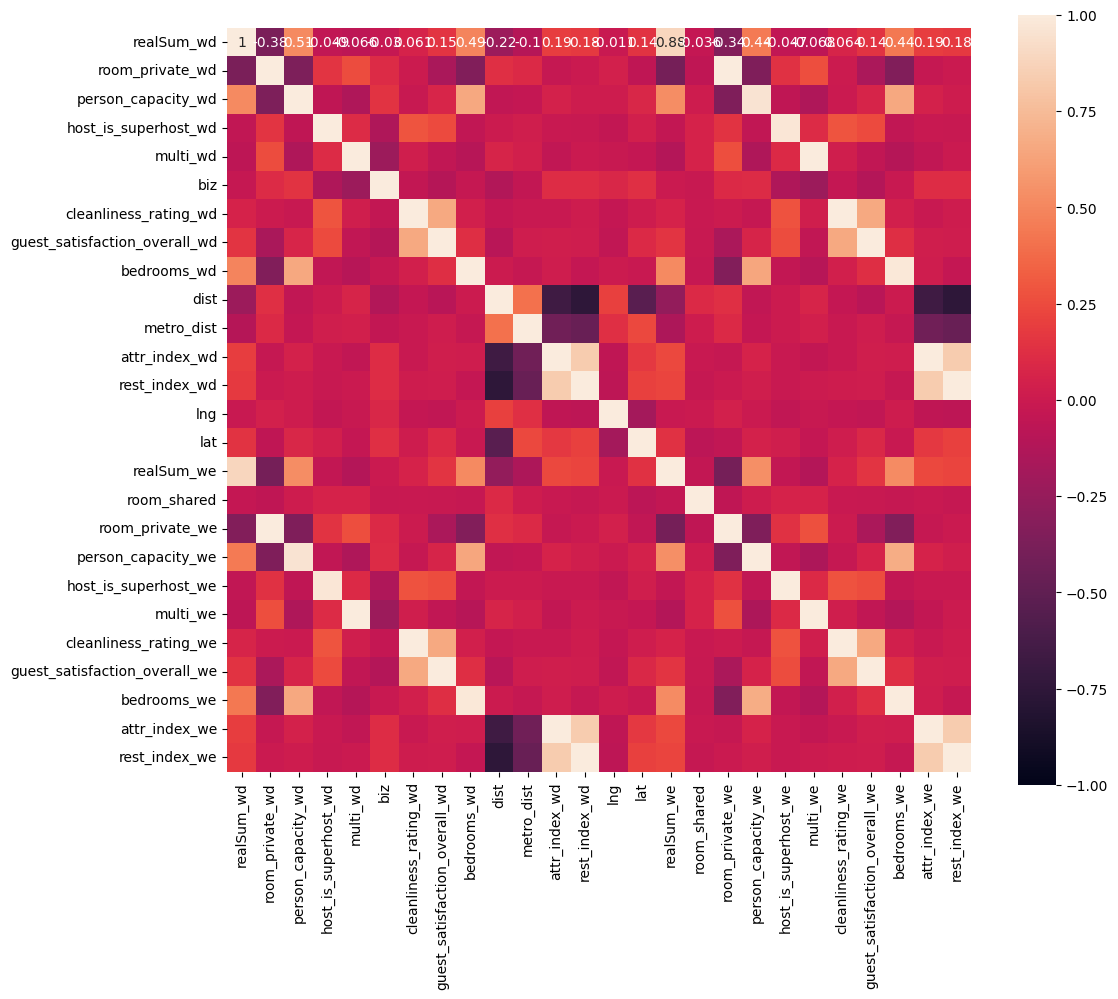

In [37]:
# -------------------------------------------------------------------------
#we start by doing a general multivariate analysis just to quickly oversee some info

corr_matrix = df_amsterdam.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1,vmax=1, square=True, annot=True)

In [34]:
'''
from the correlation matrix made above, we can already make some assumptions and observations:
    - the data of weekend and weekdays is correlated (all attributes _wd compared with their _we counterpart
    show a big correlation index)
    -person_capacity and bedrooms are the atrributes which seem more correlated with the real_sum
    -host_is_a_superhost seems to be correlated with cleanliness_rating and great_satisfaction_overall
    -real_sum is the other factor that correlates with both guest_satisfaction_overall and cleanliness_rating
    -room_shared and room_private seem to be correlated with dist
    -the real_sum is correlating with attr_index and rest_index
    -multi is correlated with room_shared
'''

'\nfrom the correlation matrix made above, we can already make some assumptions and observations:\n    - the data of weekend and weekdays is correlated (all attributes _wd compared with their _we counterpart\n    show a big correlation index)\n    -person_capacity and bedrooms are the atrributes which seem more correlated with the real_sum\n    -host_is_a_superhost seems to be correlated with cleanliness_rating and great_satisfaction_overall\n    -real_sum is the other factor that correlates with both guest_satisfaction_overall and cleanliness_rating\n    -room_shared and room_private seem to be correlated with dist\n    -the real_sum is correlating with attr_index and rest_index\n    -multi is correlated with room_shared\n'

In [35]:
#as we can see from the correlation matrix (and as earlier predicted), the attr_index and attr_index_norm seem
#to be giving redundant data. The same goes for rest_index and rest_index_norm. Since this is the case, we will
#simply drop the normalized versions, since we cannot verify the calculations made, and we'd rather work with
#raw data
df_amsterdam = df_amsterdam.drop(['attr_index_norm_wd'], axis=1)
df_amsterdam = df_amsterdam.drop(['attr_index_norm_we'], axis=1)
df_amsterdam = df_amsterdam.drop(['rest_index_norm_wd'], axis=1)
df_amsterdam = df_amsterdam.drop(['rest_index_norm_we'], axis=1)

In [36]:
df_amsterdam.tail()

,realSum_wd,room_type_wd,room_private_wd,person_capacity_wd,host_is_superhost_wd,multi_wd,biz,cleanliness_rating_wd,guest_satisfaction_overall_wd,bedrooms_wd,...,room_shared,room_private_we,person_capacity_we,host_is_superhost_we,multi_we,cleanliness_rating_we,guest_satisfaction_overall_we,bedrooms_we,attr_index_we,rest_index_we
712,378.693788,Entire home/apt,False,2.0,False,0,0,9.0,83.0,1,...,False,False,2.0,False,0,9.0,83.0,1,181.296613,216.226995
713,295.034331,Private room,True,2.0,False,0,1,8.0,86.0,1,...,False,True,2.0,False,0,8.0,86.0,1,107.335569,132.700155
714,356.197127,Private room,True,4.0,True,0,0,10.0,95.0,1,...,False,True,4.0,True,0,10.0,95.0,1,224.435844,291.789702
715,2486.115342,Entire home/apt,False,2.0,False,0,0,10.0,100.0,1,...,False,False,2.0,False,0,10.0,100.0,1,181.197012,225.302583
716,1812.855904,Entire home/apt,False,4.0,False,0,0,8.0,84.0,5,...,False,False,4.0,False,0,8.0,84.0,5,257.946814,336.589450


<Axes: xlabel='cleanliness_rating_wd', ylabel='Count'>

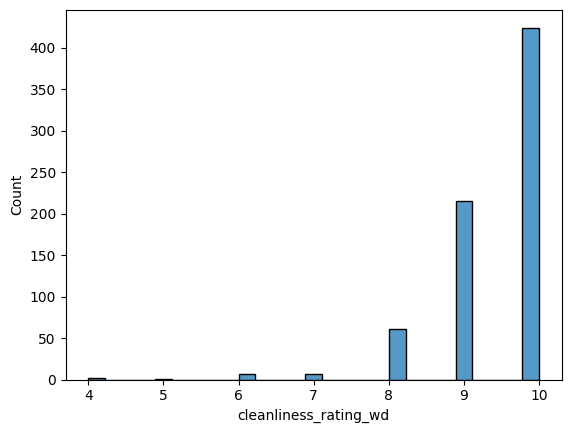

In [46]:
#to better illustrate the observations and assumptions made from the correlation matrix, we will start making new
#graphs to assertain the situation better
#we start by illustrating the correlations between attributes _wd and _we
sns.histplot(data=df_amsterdam, x="cleanliness_rating_wd")

In [1]:
#then, we must start comparing cleanliness and guest_satisfaction
sns.catplot(data=df_amsterdam, x="cleanliness_rating_we", y="guest_satisfaction_overall_we")
sns.catplot(data=df_amsterdam, x="cleanliness_rating_wd", y="guest_satisfaction_overall_wd")

NameError: name 'sns' is not defined